![image info](https://ineuron.ai/images/ineuron-logo.png)

## 1. Problem Statement:

- Here our objective is to build a model which will predict wheather a person is trying to change his/her job or not?

## 2) Data Collection.
* The Dataset is collected from https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists
* The data consists of 14 column and 19158 rows.

### 2.1 Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/aug_train.csv')

#### Show Top 5 Records

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


#### Shape of the dataset

In [4]:
df.shape

(19158, 14)

#### Summary of the dataset

- The described method will help to see how data has been spread for numerical values.
- We can clearly see the minimum value, mean values, different percentile values, and maximum values.

In [5]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


#### Insights
- 'training_hours'  feature max value is too much above mean.
- Needs further investigation

#### Check Datatypes in the dataset
#### info() is used to check the Information about the data and the datatypes of each respective attribute

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

#### Insights
- Most of the data is categorical, As data has 10 object and 4 numeric feature.
- There are lots of missing values

## 3. EXPLORING DATA

In [7]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['enrollee_id', 'city_development_index', 'training_hours', 'target']

We have 10 categorical features : ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


#### Feature Information

- **enrollee_id** : Unique ID for candidate
- **city** : City code
- **city_ development _index** : Developement index of the city (scaled)
- **gender** : Gender of candidate
- **relevent_experience** : Relevant experience of candidate
- **enrolled_university** : Type of University course enrolled if any
- **education_level** : Education level of candidate
- **major_discipline** :Education major discipline of candidate
- **experience** : Candidate total experience in years
- **company_size** : No of employees in current employer's company
- **company_type** : Type of current employer
- **lastnewjob** : Difference in years between previous job and current job
- **training_hours** : training hours completed
- **target** : 0 – Not looking for job change, 1 – Looking for a job change

#### Univariate Analysis of Numerical Features

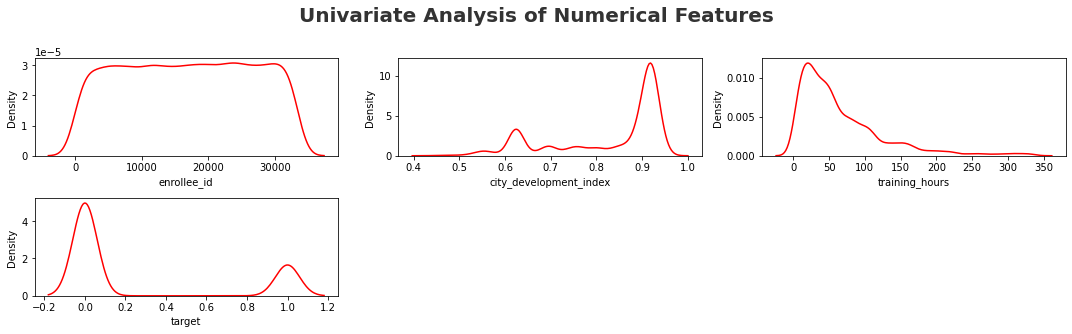

In [8]:
plt.figure(figsize=(15, 10))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight="bold", alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color="red")
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


#### Univariate Analysis of Categorical Features

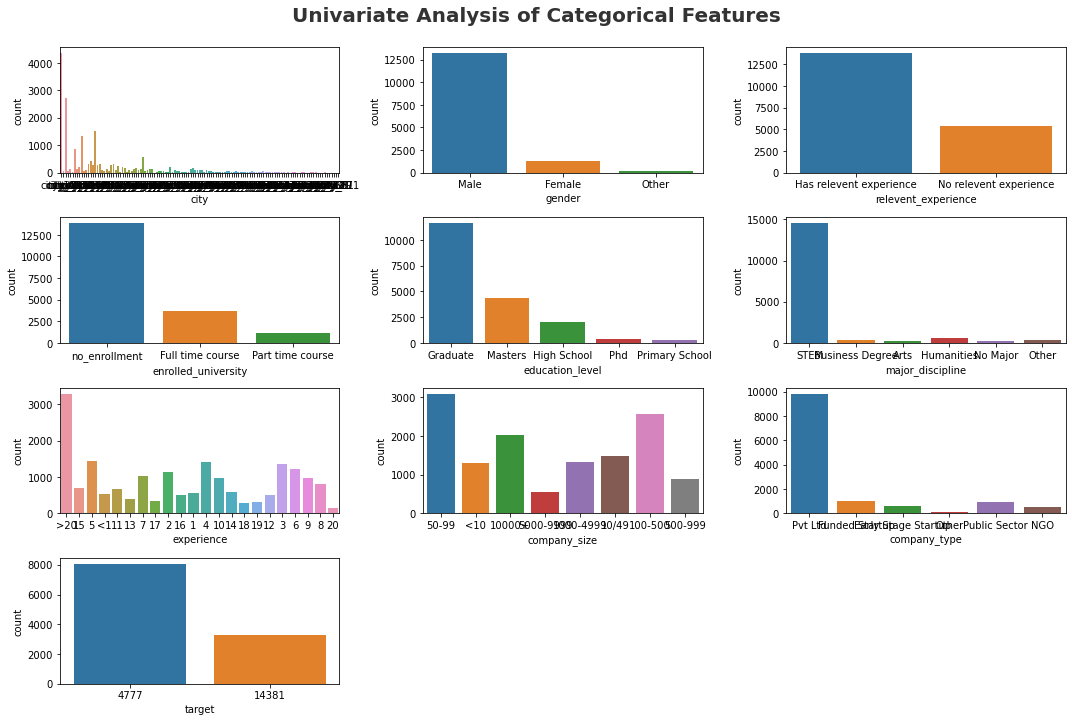

In [9]:
# categorical columns
plt.figure(figsize=(15, 10))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20, fontweight="bold", alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(4, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
target_count= df['target'].value_counts()
sns.countplot(x=target_count)
plt.show()


#### Insights
- We have 25% of employees leaving and 75% staying back
- Many employees prefer to stay in developed cities

#### Explore Categorical columns and their distribution with respect to target columns

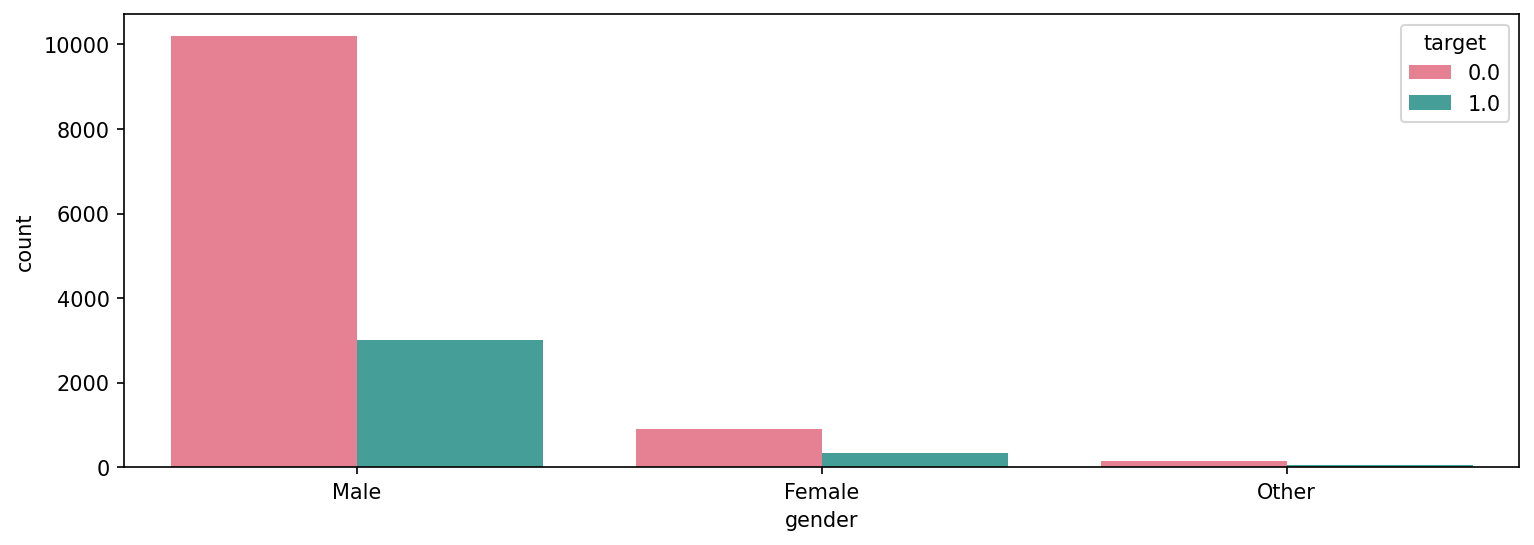

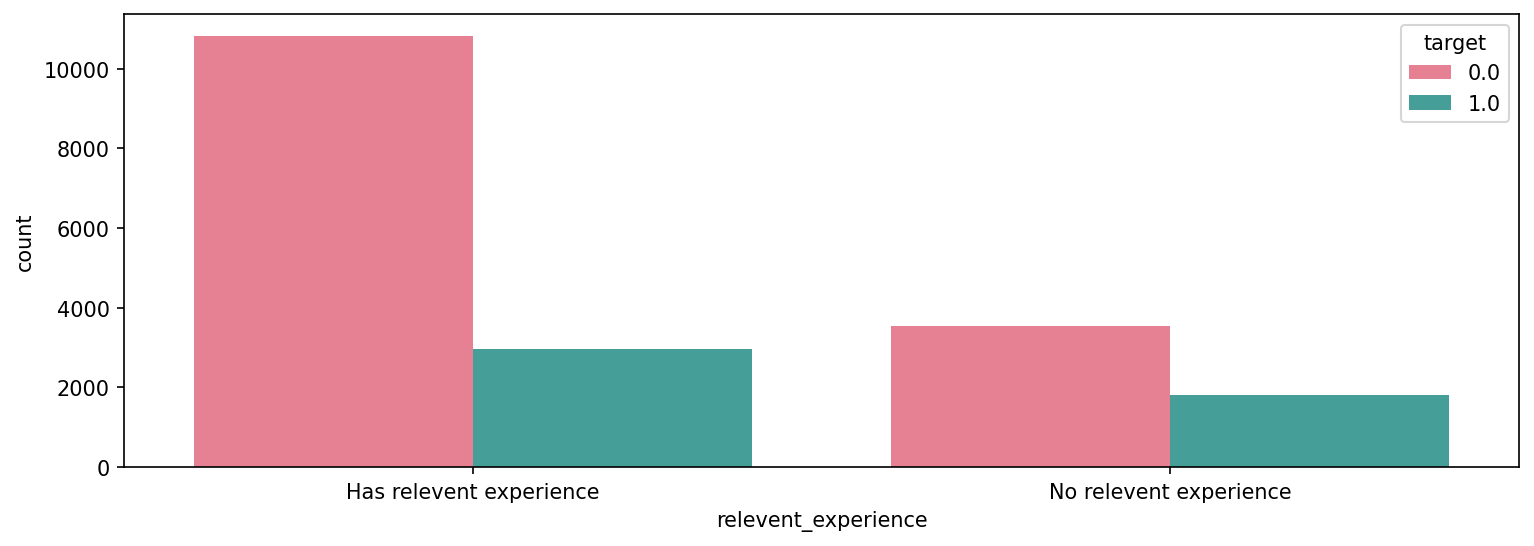

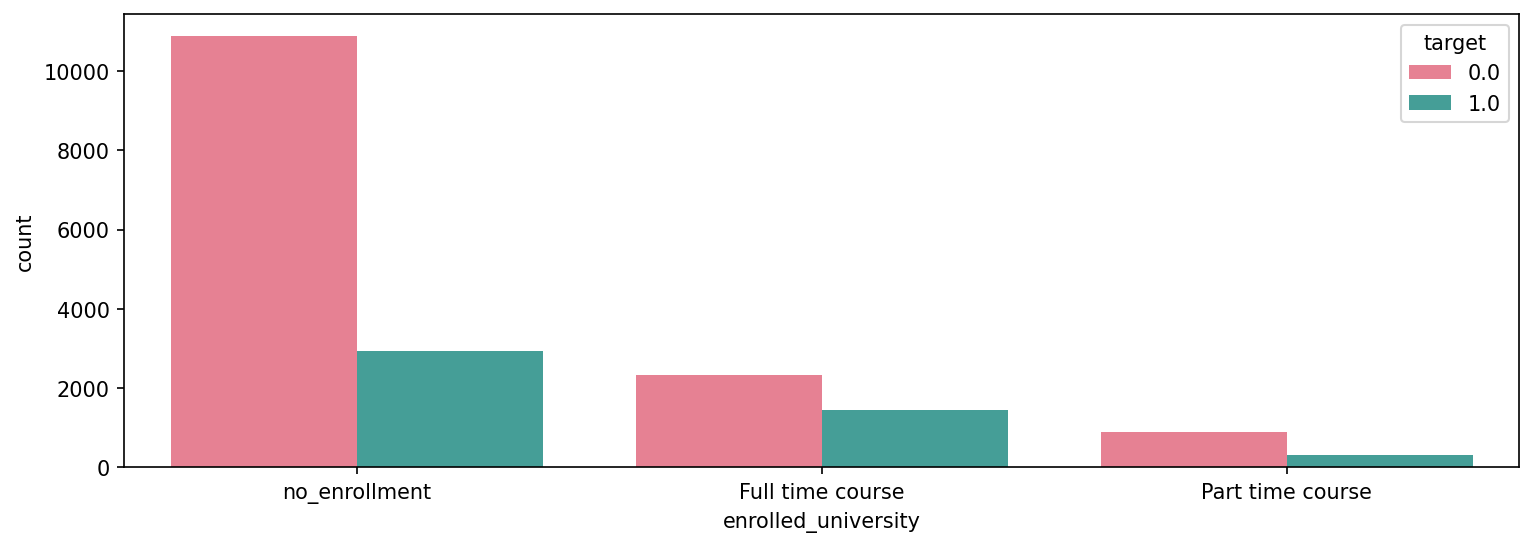

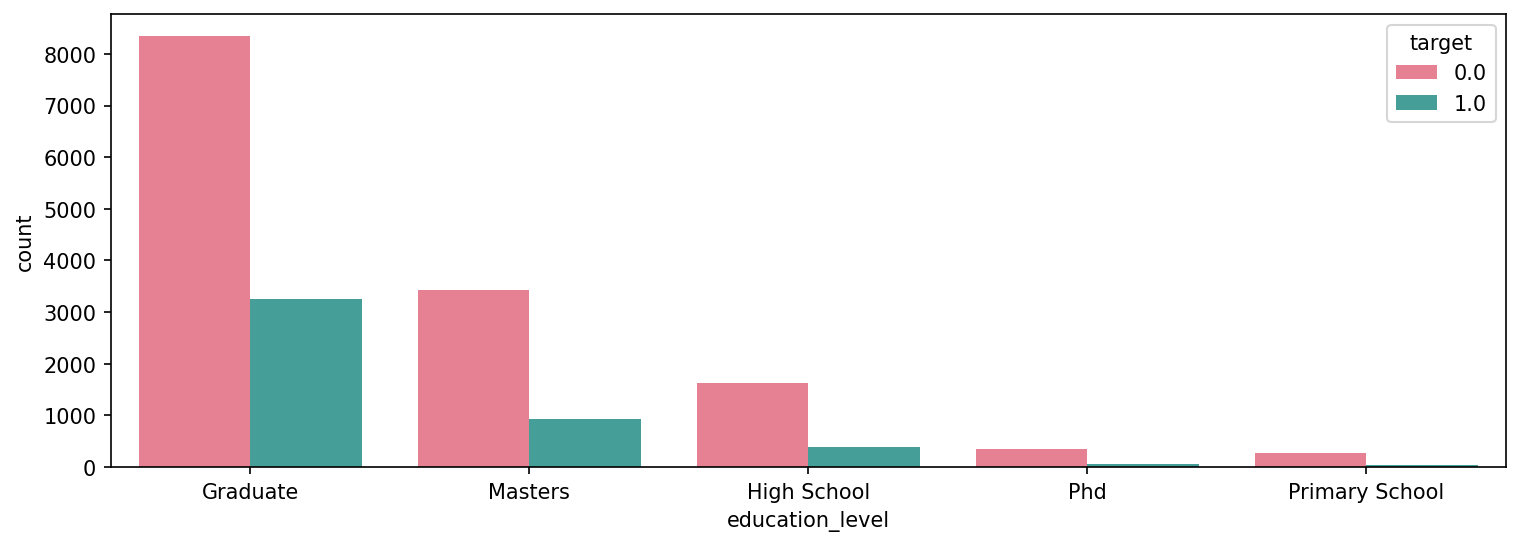

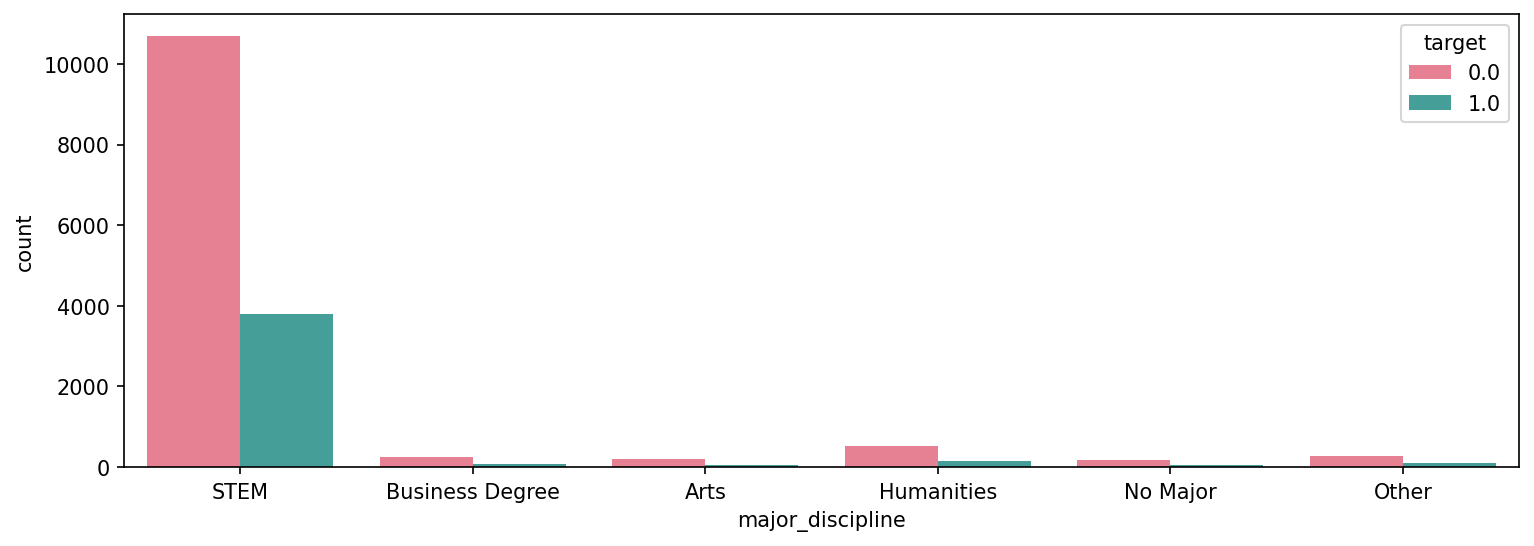

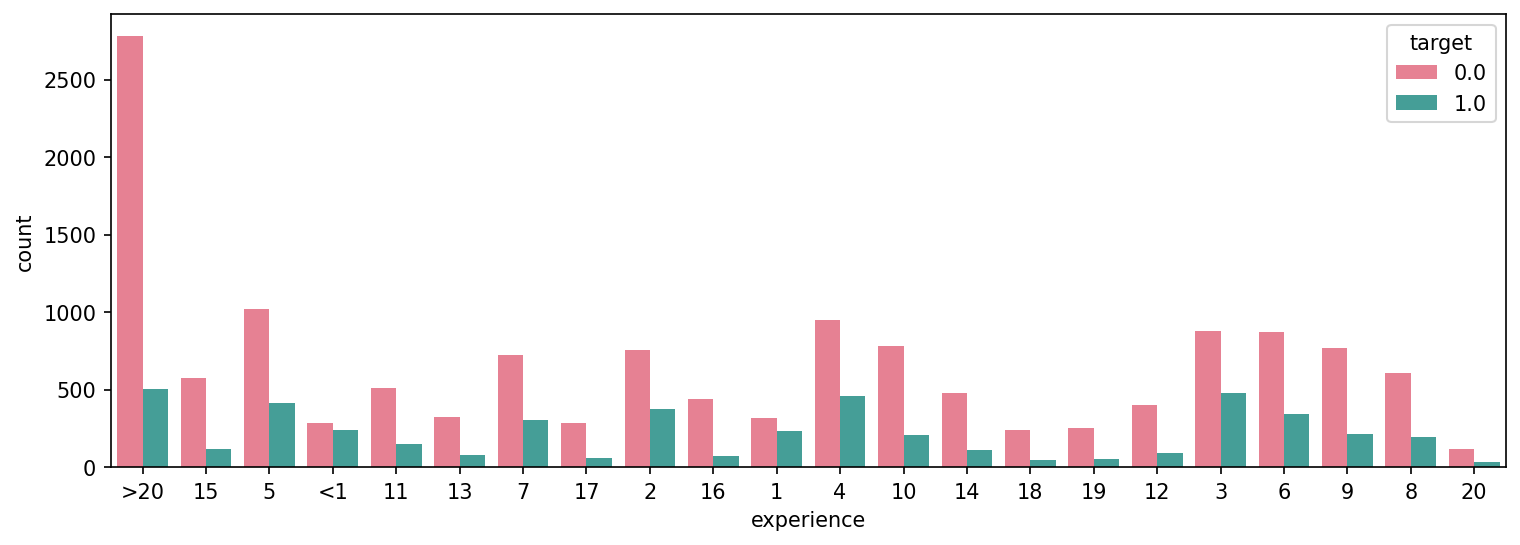

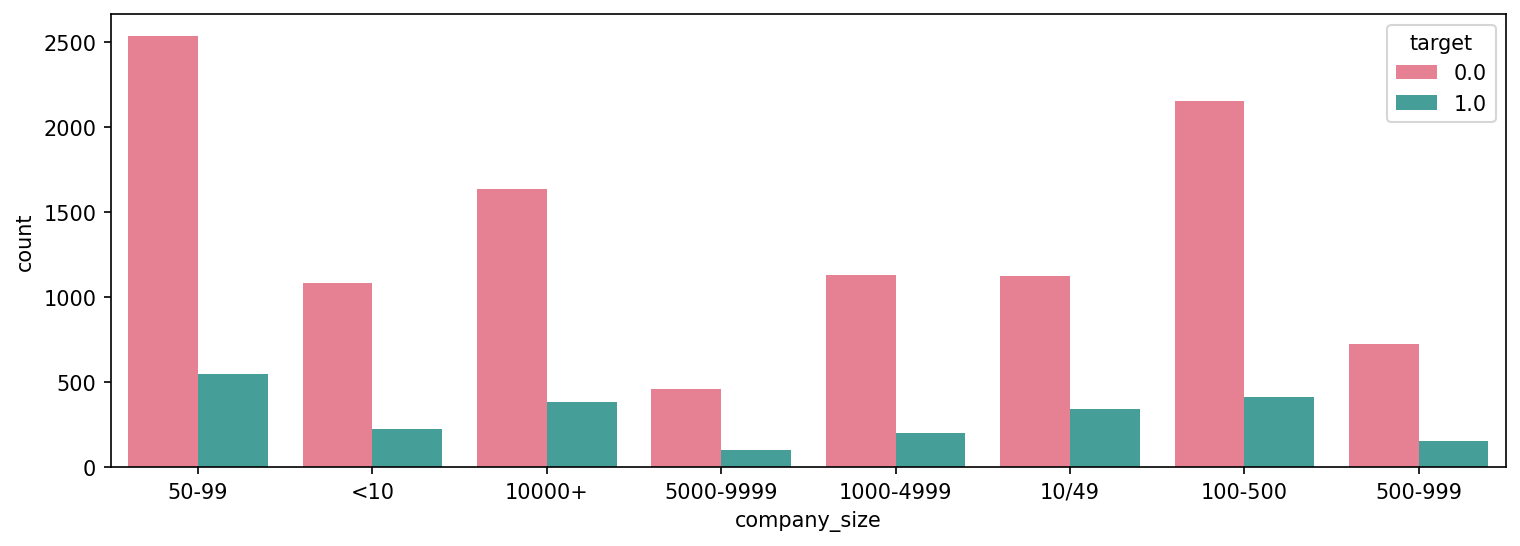

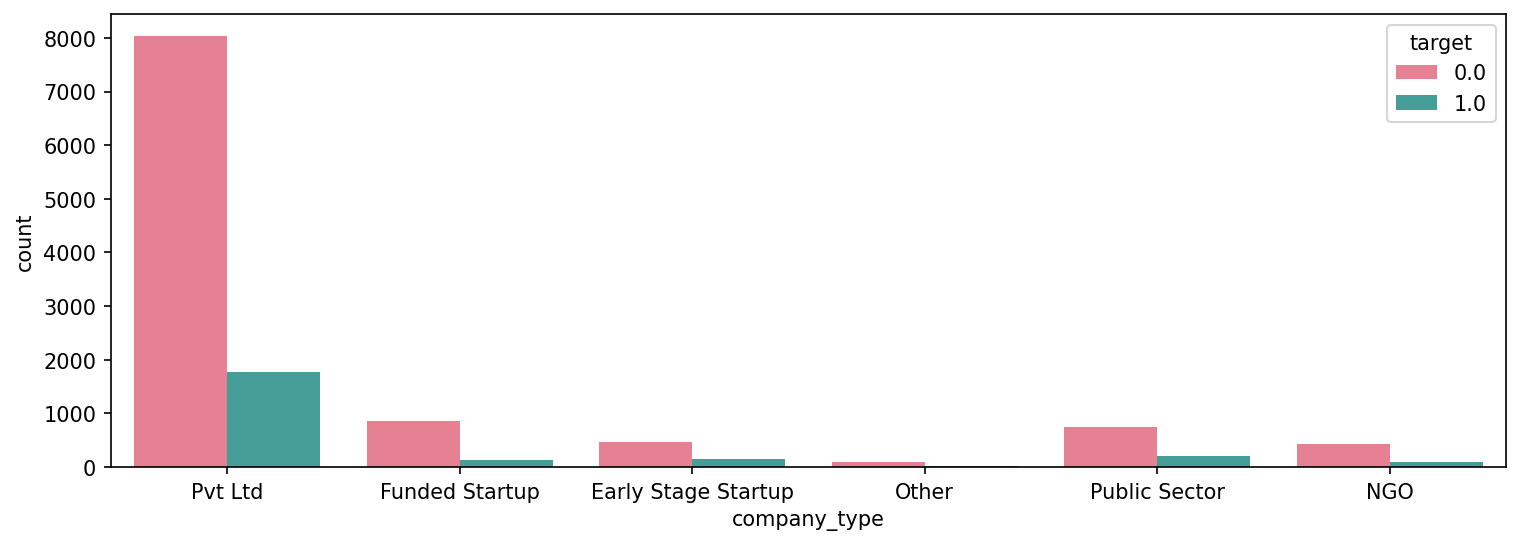

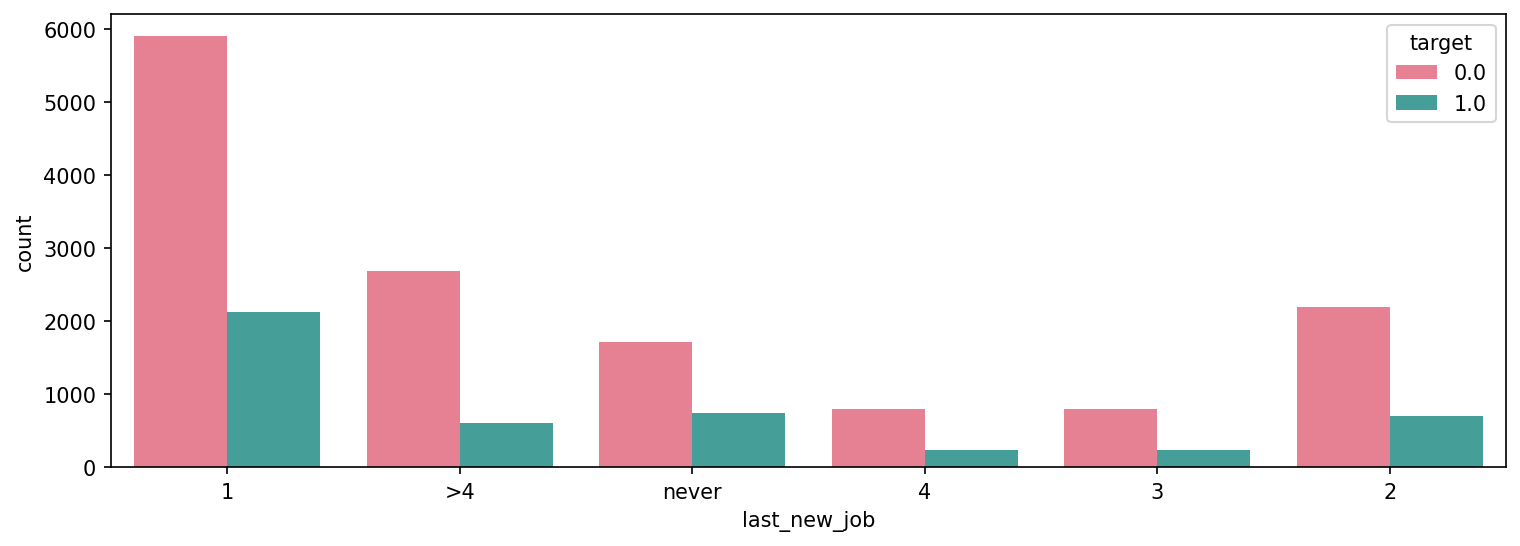

In [10]:
df_countplot = df.drop(['target','training_hours','city_development_index','enrollee_id','city'], axis=1)
for col in df_countplot.columns:
    plt.figure(figsize=(12,4), dpi=150)
    ax = sns.countplot(data=df,x=col, hue='target', palette='husl')

#### Insights
- From above charts it can be clearly noiced that one class is highy dominant than ohers.
- There is an imbalance in the classes

#### Explore Numerical columns and their distribution with respect to target columns

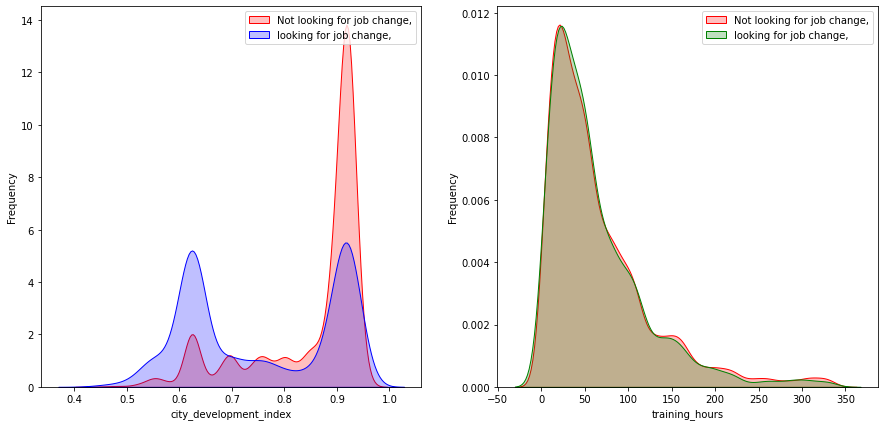

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
graph = sns.kdeplot(df['city_development_index'][(df["target"] == 0) & (df['city_development_index'].notnull())], color="Red", shade = True)
graph = sns.kdeplot(df['city_development_index'][(df["target"] == 1) & (df['city_development_index'].notnull())], color="Blue", shade= True)
graph.set_xlabel('city_development_index')
graph.set_ylabel("Frequency")
graph = graph.legend(["Not looking for job change,","looking for job change,"])
plt.subplot(122)
g = sns.kdeplot(df['training_hours'][(df["target"] == 0) & (df['training_hours'].notnull())], color="Red", shade = True)
g = sns.kdeplot(df['training_hours'][(df["target"] == 1) & (df['training_hours'].notnull())], color="Green", shade= True)
g.set_xlabel('training_hours')
g.set_ylabel("Frequency")
g = g.legend(["Not looking for job change,","looking for job change,"])
plt.show()

#### Insights

- Peoples interested in changing job having city_development_index ranging beween .666 and and .9.
- Peoples are toatally not interested in job change whose city_development_index are nearly .9

### Q. Which Gender is looking to change job ??

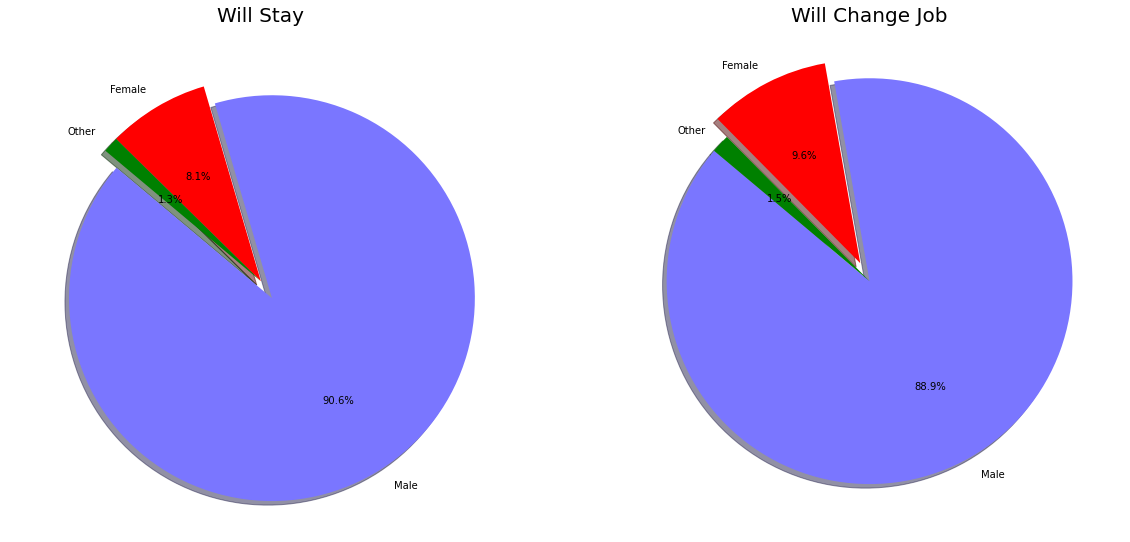

In [12]:
value_st=df['gender'].loc[df['target']==0.0].value_counts() 
value_ng=df['gender'].loc[df['target']==1.0].value_counts()
f,ax=plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
plt.pie(x=list(value_st.values),labels=list(value_st.index),explode=[0.1,0,0],autopct='%1.1f%%',startangle=140,shadow=True,colors=['#7A76FF','red','green'])
plt.title("Will Stay",fontsize=20)
plt.subplot(122)
plt.pie(x=list(value_ng.values),labels=list(value_ng.index),explode=[0,0.1,0],autopct='%1.1f%%',startangle=140,shadow=True,colors=['#7A76FF','red','green'])
plt.title("Will Change Job",fontsize=20)
plt.show()

#### Insights
- We have more male employees than female. Others are the least in number.
- For all the employees staying and working for company, 90% (10,200)male and only 8.1% (912)female.
- For all the employees looking for a job change 88% (3000)male and only 9.6% (326)female.
- 141 "others" will continue to work and where as 50 of them are looking for a change.
- If we look at the ratio then more men are looking for a change than women & Others.

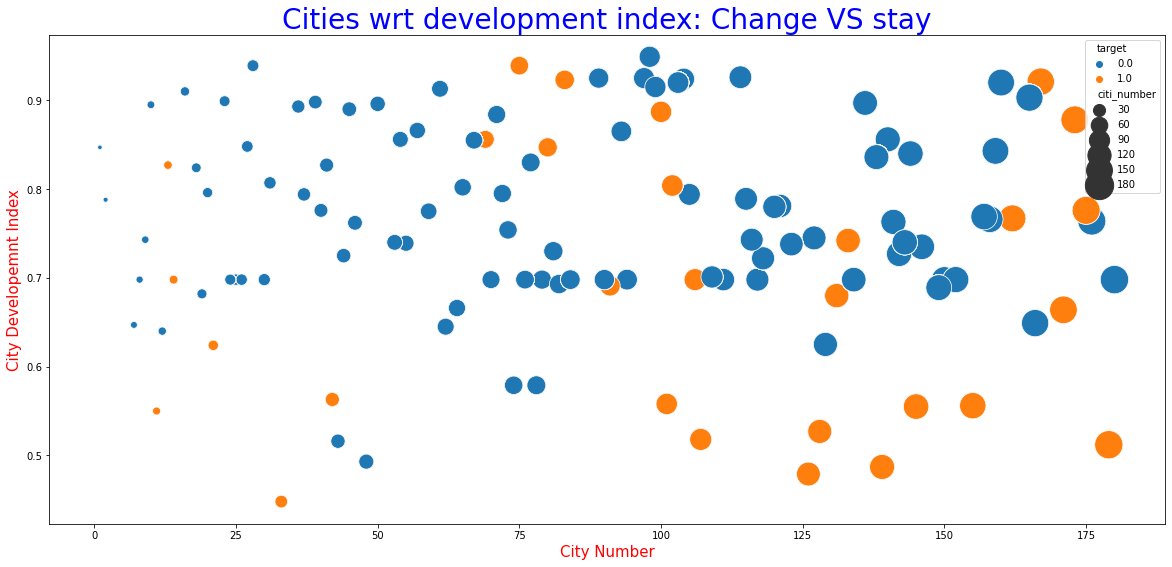

In [13]:
#removing city_ from city values and converting to int
plt.figure(figsize=(20,9)) 
df['citi_number']=df['city'].str.strip('city_')
df['citi_number']=df['citi_number'].astype(int)
sns.scatterplot(data=df, x= df['citi_number'], y = df['city_development_index'],hue=df['target'], size="citi_number", sizes=(20, 800))
plt.xlabel("City Number",size=15,c="r")
plt.ylabel("City Developemnt Index",size=15,c="r")
plt.title("Cities wrt development index: Change VS stay",size=28,c="b")
plt.show()

#### Insights
- Blue denotes employees who wants to stay and Orange denotes those who want a change.
- Lets put an imaginary line at 6.5 development index on y axis.Most of the Orange dots are below 6.5 index and Blue dots above this line.
- More employees look for a change in cities with low development index.
- Here we can see the Orange dots mostly have low development index.
- City development is an important factor who look for change.

#### Relation of city development index with the target feature

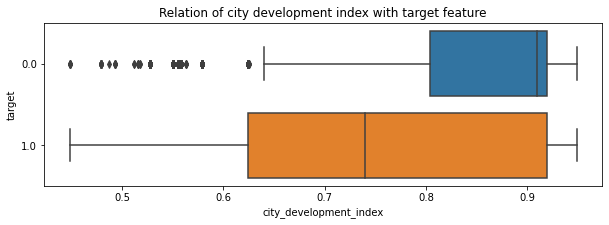

In [14]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df, x='city_development_index', y='target', orient='h')
plt.title('Relation of city development index with target feature')
plt.show()

#### Insights
- It turns out majority of people looking for job are in cities with low city development index.
- It makes more sense as people in lesser developed cities will like to look for jobs and move to more developed cities.

#### Any gender disparity in age causing employees to leave office??

<AxesSubplot:xlabel='target,gender'>

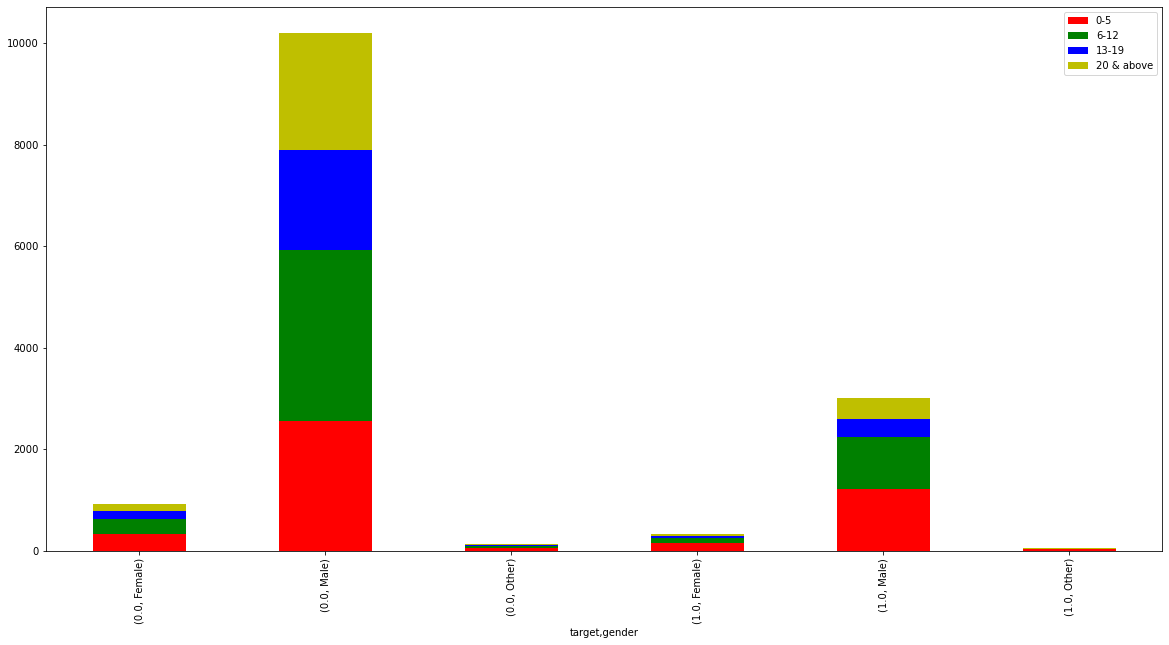

In [15]:
seggregate={'experience': {">20":25,"<1":0.5}}
df=df.replace(seggregate)
colors = ["r","g","b","y"]
df['experience']=df['experience'].astype(float)
df['experience_group']=pd.cut(df.experience,[0,5,12,19,25],labels=['0-5','6-12','13-19','20 & above'])
gender_exp=df.groupby(['target','gender'])['experience_group'].value_counts().unstack()

gender_exp.plot(kind='bar', stacked=True, color=colors,figsize=(20,10) )

#### Insights
- Employee ratio wrt gender shows the gender disparity clearly.
- We have very few women with 20+ experience as compared to young group(below 5).
- Even less number of people in others gender leaving the job.
- Men with expirence of 0-5 years are more likely to switch job than women.
- Others are likely to stay back with more experience.

#### New joinees or old employees :Who is more likely to change??

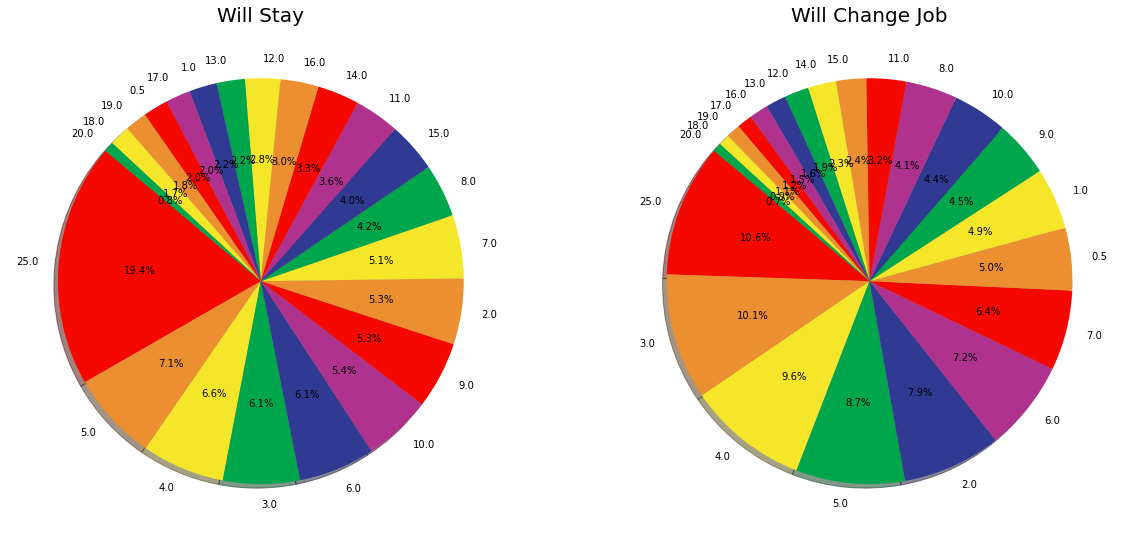

In [16]:
value_st=df['experience'].loc[df['target']==0.0].value_counts() 
value_ng=df['experience'].loc[df['target']==1.0].value_counts()
f,ax=plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
plt.pie(x=list(value_st.values),labels=list(value_st.index),autopct='%1.1f%%',startangle=140,shadow=True,colors=['#F50800','#EC8F30','#F6E629','#00A64C','#303A93','#AE328E'])
plt.title("Will Stay",fontsize=20)
plt.subplot(122)
plt.pie(x=list(value_ng.values),labels=list(value_ng.index),autopct='%1.1f%%',startangle=140,shadow=True,colors=['#F50800','#EC8F30','#F6E629','#00A64C','#303A93','#AE328E'])
plt.title("Will Change Job",fontsize=20)
plt.show()

#### Insights
- For all the employees going to work for company 19% are of 20+ years of experience and highest number of employees belongs to this category.
- At the same time, if we look at employees looking for a change, 10% of them have 20+ years of experience. Another 10% having 3 years of experience are also willing switch company
- Nearly 2% (285) of total staying have <1 year experience, 237 which is 5% of total leaving. Similar observation with 2 years experience people.
- We have few employees with 1,2 years of experience but they are the one leaving more.

#### Which gender has more relevant experience in organisation?

<AxesSubplot:xlabel='target,relevent_experience'>

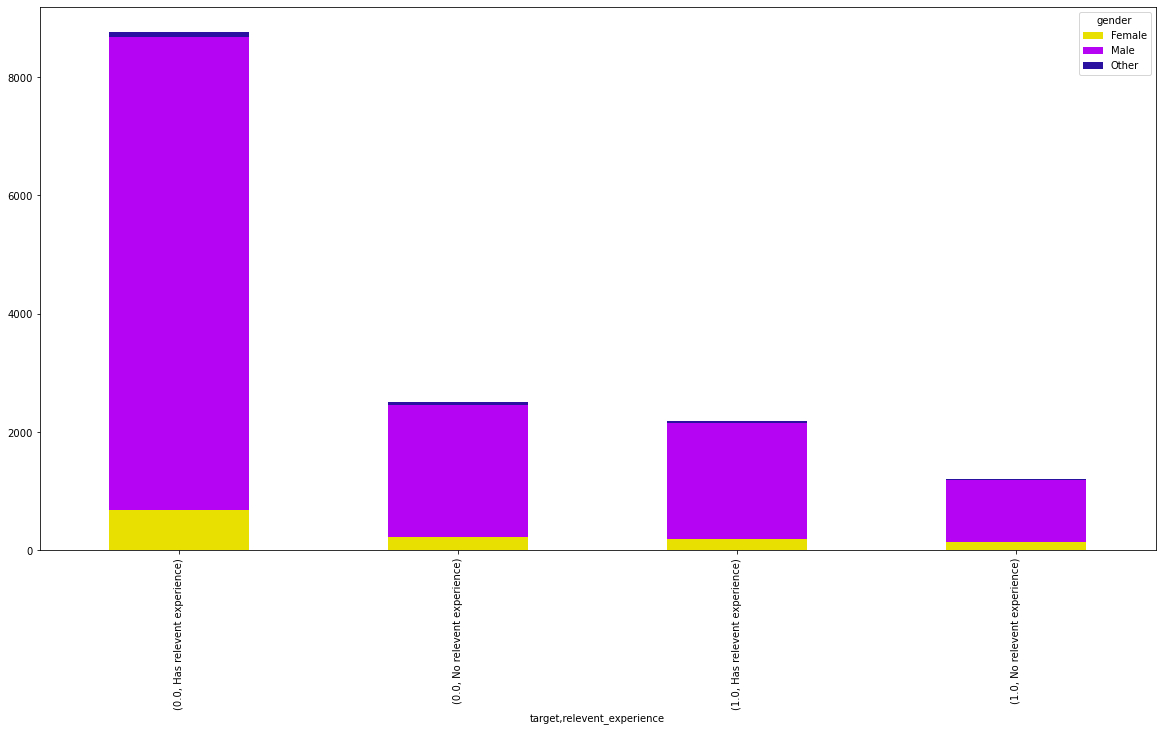

In [17]:
colors = ["#E7E000","#B404F3","#2A11A0"]
gender_rel_exp=df.groupby(['target','relevent_experience'])['gender'].value_counts().unstack()
gender_rel_exp.plot(kind='bar', stacked=True,color=colors,figsize=(20,10) )

#### Insights
- There are MEN 90% and others 10% is showing baised.
- 24 Others with relevant and 26 with no relevant experience are leaving. So others gender relevance does not have an impact. They are leaving or staying is a choice.
- 187 women with relevant and 139 with no relevant experience are leaving. Not a big difference.
- But 684 mens with relevant and 228 with no relevant experience are staying back. Comparatively there is a significant difference who are staying back.

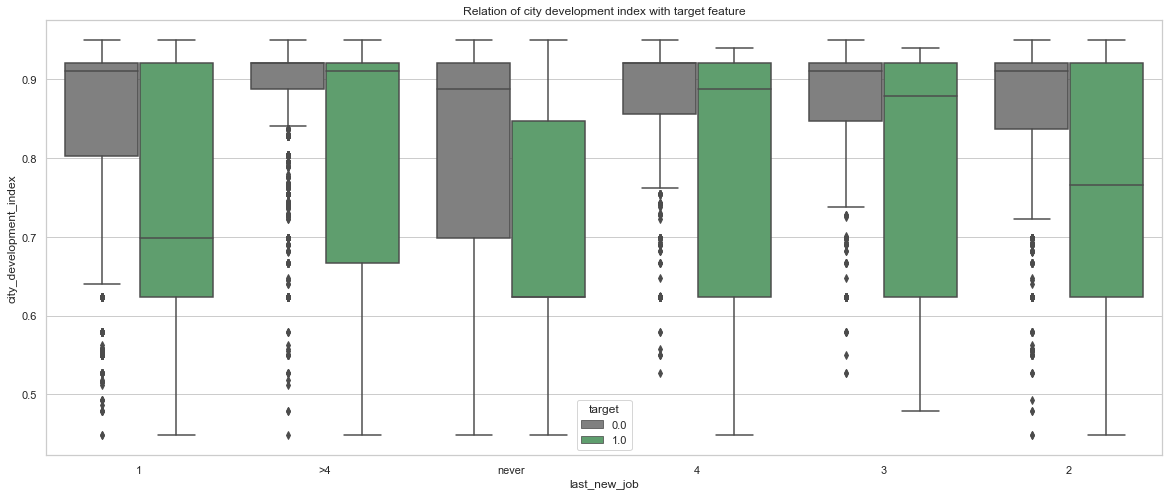

In [18]:
plt.figure(figsize=(20, 8))
sns.set(style='whitegrid')
sns.boxplot(data=df, x='last_new_job', y='city_development_index', hue="target", orient='v',palette=sns.color_palette(('.5', 'g')))
plt.title('Relation of city development index with target feature')
plt.show()

- People who wants to stay in Job are staying in more developed city than those are leaving.
- We notice never switched group of people has lowest median value, 
   - which means established people are okay in living less developed city also.
- We can observe 1 yr group of people also has second lowest median index value.
    - Which means people are changing frequently. 

#### Do developed cities have more training hours?

<AxesSubplot:xlabel='city_development_index', ylabel='experience'>

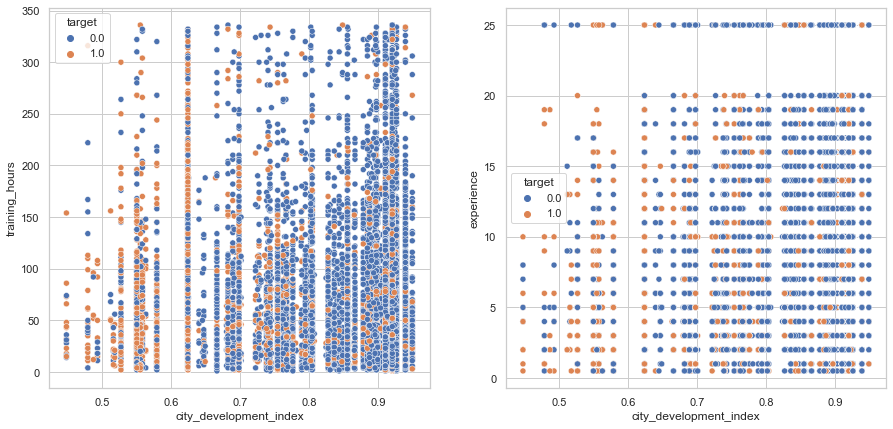

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.scatterplot(data=df, x="city_development_index", y="training_hours", hue="target")
plt.subplot(122)
sns.scatterplot(data=df, x="city_development_index", y="experience", hue="target")

#### Insights
- From 1st scatterplot 
    - Develpoed cities are having good amount of traing hours where people are staying in job.
    - Under developed cities do not have good training hours where employees are leaving.
- From 2nd scatterplot
    - People with 15 to 20 years experience and staying in underdeveloped cities are looking for a change.

<AxesSubplot:xlabel='major_discipline', ylabel='training_hours'>

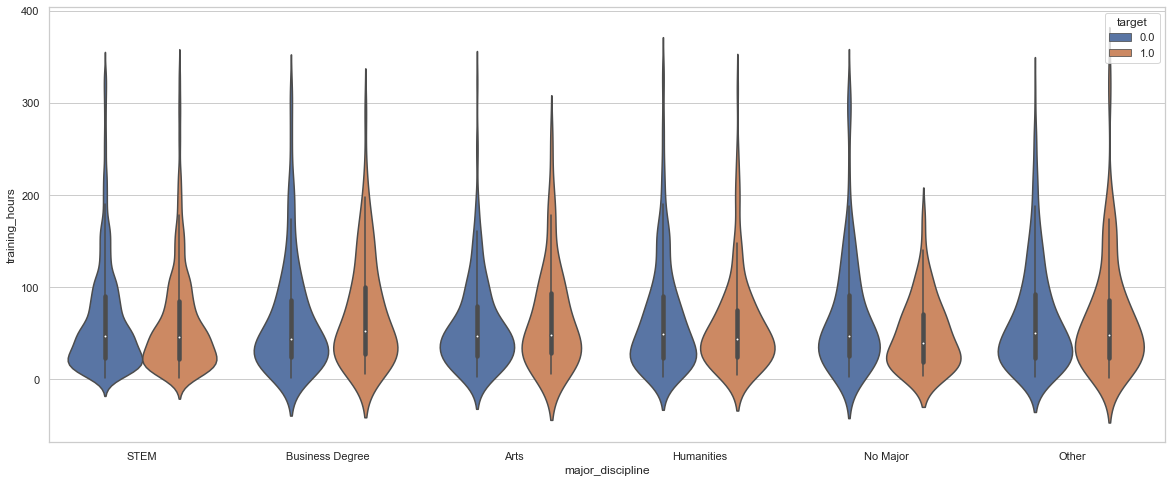

In [20]:
plt.figure(figsize=(20, 8))
sns.violinplot(x ='major_discipline', y ='training_hours', hue='target',data = df)

#### Insights
- Humanities and others have more training hours.

#### Can university course type enrollment has anything do with job stay or switch ??

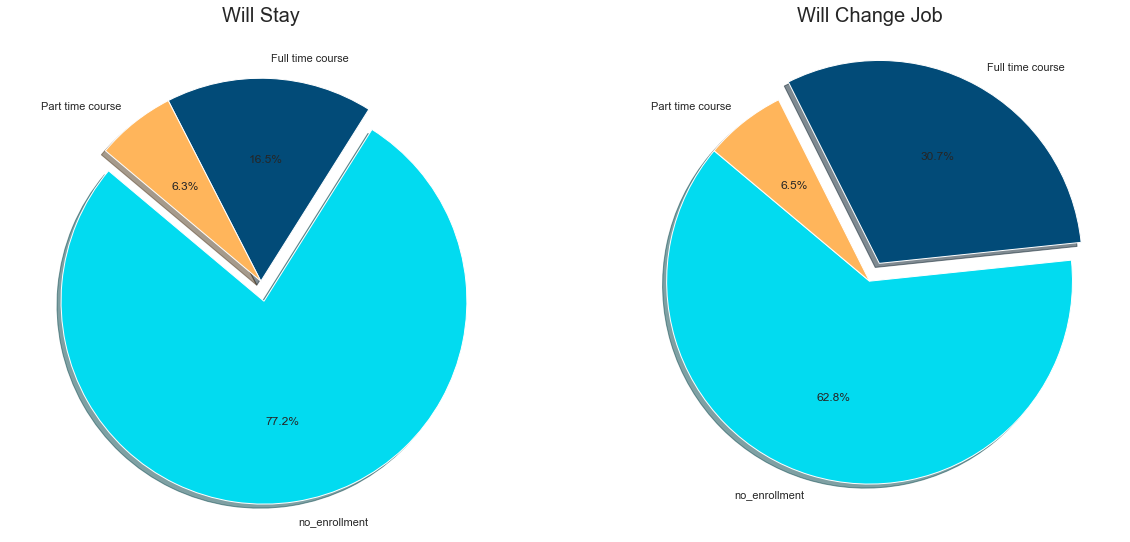

In [21]:
value_st=df['enrolled_university'].loc[df['target']==0.0].value_counts() 
value_ng=df['enrolled_university'].loc[df['target']==1.0].value_counts()
f,ax=plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
plt.pie(x=list(value_st.values),labels=list(value_st.index),explode=[0.1,0,0],autopct='%1.1f%%',startangle=140,shadow=True,colors=['#02DBF0','#024B78','#FFB55B'])
plt.title("Will Stay",fontsize=20)
plt.subplot(122)
plt.pie(x=list(value_ng.values),labels=list(value_ng.index),explode=[0,0.1,0],autopct='%1.1f%%',startangle=140,shadow=True,colors=['#02DBF0','#024B78','#FFB55B'])
plt.title("Will Change Job",fontsize=20)
plt.show()

#### Insights
- Most of our employees have no enrollment whether they will stay or change job doesn't matter.
- 896 employees with part time course will stay in job and 300 are looking for a change.
- 2326 employees with full time course will stay in job and 1431 are looking for a change. More than 50% are looking for a change.
- If we look at no enrollment group, 2000 will leave while 10000 will stay back.
- Employees with full time course are actually leaving more in number than others.

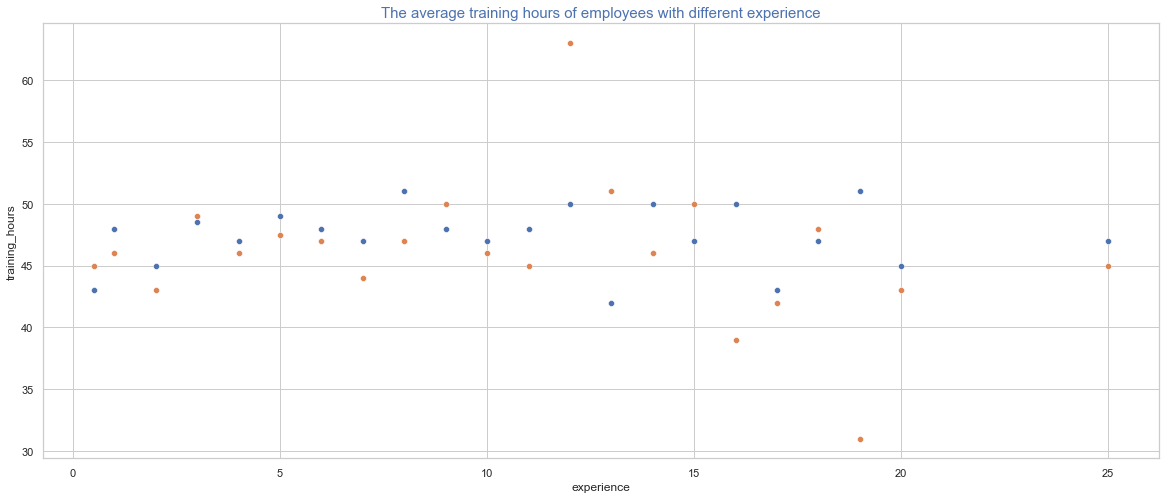

In [22]:
plt.figure(figsize=(20, 8))
markers = {"stay": "s", "change": "X"}
change=df[df.target==1.0].groupby('experience').training_hours.median().to_frame()
stay=df[df.target==0.0].groupby('experience').training_hours.median().to_frame()
sns.scatterplot(data=stay, x=stay.index,y=stay['training_hours'])
sns.scatterplot(data=change,  x=change.index,y=change['training_hours'])
plt.title("The average training hours of employees with different experience",size=15,c="b")
plt.show()

#### Insights
- Blue = Stay in Job , Orange = Change Job
- Most of the employees who are looking for a change are having less traing hours on average than who want to stay.
- 12years is an exception, as we have seen training hours distribution is highly right skewd and have many outliers.

<AxesSubplot:ylabel='target,education_level'>

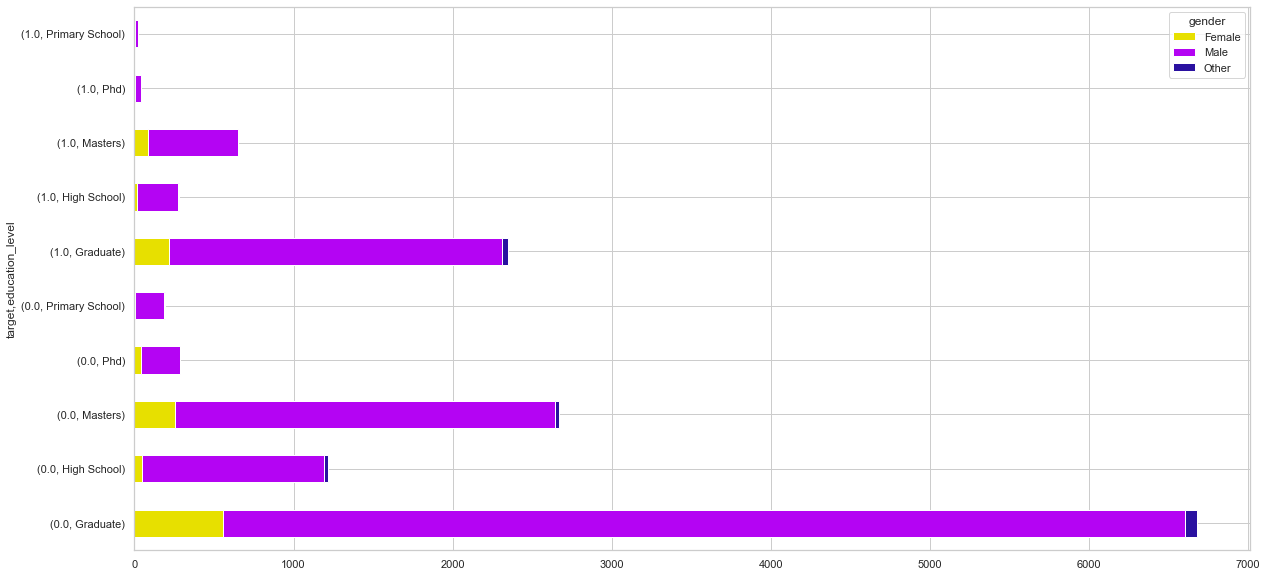

In [23]:
colors = ["#E7E000","#B404F3","#2A11A0"]
gender_rel_exp=df.groupby(['target','education_level'])['gender'].value_counts().unstack()
gender_rel_exp.plot(kind='barh', stacked=True,color=colors,figsize=(20,10) )

#### Insights
- Graduates are of largest number in oraganisation.
- Lowest count of primary School level of educaion.
- Males graduates are the most in number who will leave the organisation.

([], [])

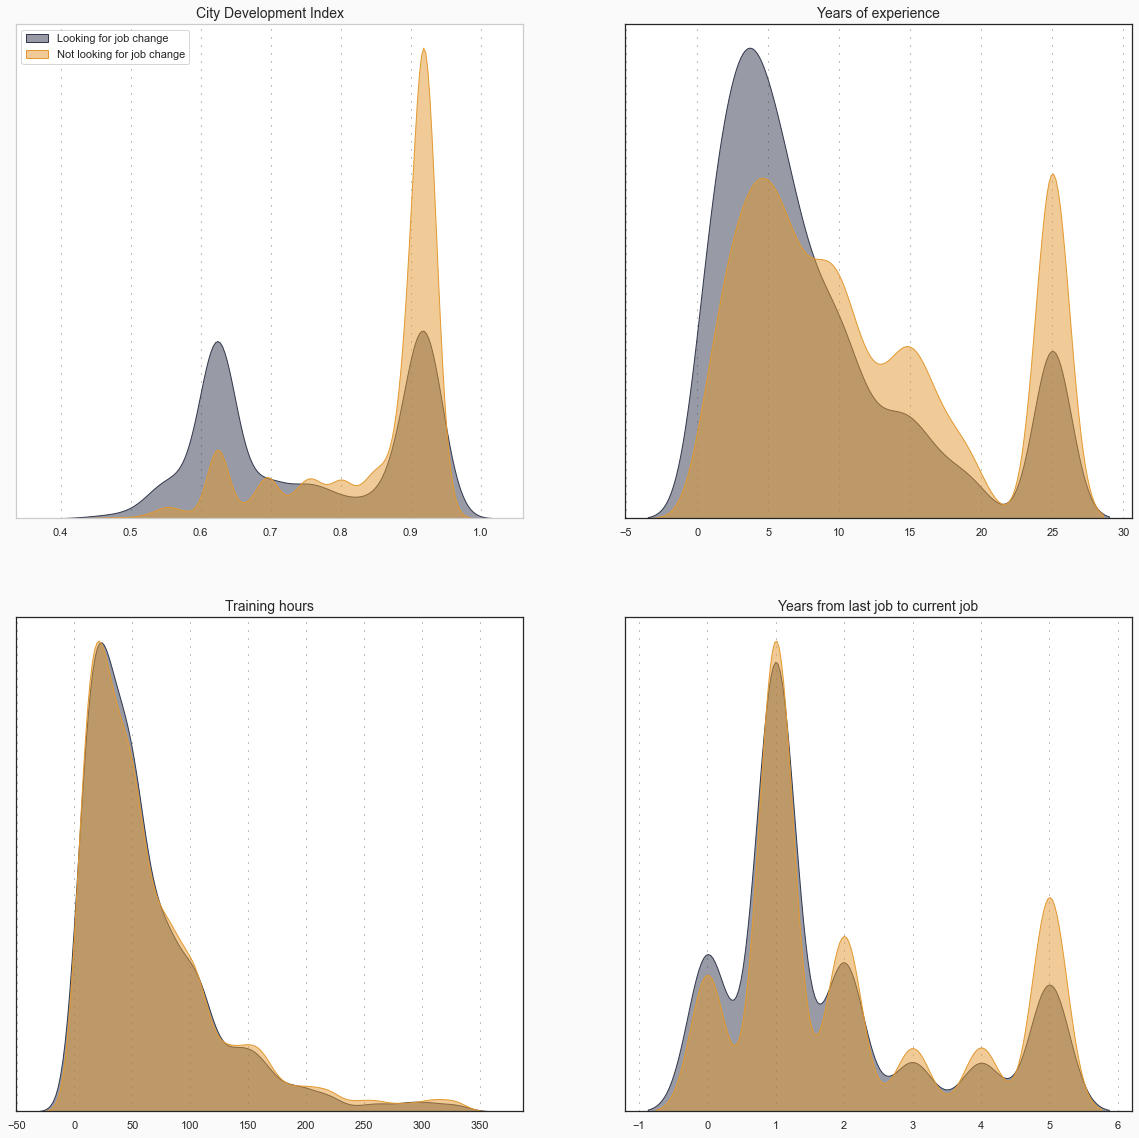

In [24]:
fig = plt.figure(figsize = (20, 20))
fig.patch.set_facecolor('#fafafa')

plt.subplot(221)
sns.set_style('white')
plt.title('City Development Index', size = 14)
sns.kdeplot(df.query('target == 1')['city_development_index'], color = '#32384D', shade = True, label = 'Looking for job change', alpha = 0.5)
sns.kdeplot(df.query('target == 0')['city_development_index'], color = '#E29930', shade = True, label = 'Not looking for job change', alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend(loc = 'upper left')
plt.subplot(222)
plt.title('Years of experience', size = 14)
sns.kdeplot(df.query('target == 1')['experience'], color = '#32384D', shade = True, label = 'Looking for job change', alpha = 0.5)
sns.kdeplot(df.query('target == 0')['experience'], color = '#E29930', shade = True, label = 'Not looking for job change', alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.subplot(223)
plt.title('Training hours', size = 14)
sns.kdeplot(df.query('target == 1')['training_hours'], color = '#32384D', shade = True, label = 'Looking for job change', alpha = 0.5)
sns.kdeplot(df.query('target == 0')['training_hours'], color = '#E29930', shade = True, label = 'Not looking for job change', alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.subplot(224)
for i in range(len(df.index)):
    if df['last_new_job'][i] == '>4':
        df['last_new_job'][i] = '5'
    elif df['last_new_job'][i] == 'never':
        df['last_new_job'][i] = '0'
lastjob_no_nan = df[pd.isna(df['last_new_job']) == False]
lastjob_no_nan['last_new_job'] = lastjob_no_nan['last_new_job'].astype('int')
plt.title('Years from last job to current job', size = 14)
sns.kdeplot(lastjob_no_nan.query('target == 1')['last_new_job'], color = '#32384D', shade = True, label = 'Looking for job change', alpha = 0.5)
sns.kdeplot(lastjob_no_nan.query('target == 0')['last_new_job'], color = '#E29930', shade = True, label = 'Not looking for job change', alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

#### Insights
- City Development Index kde plot
    - Peoples interested in changing job having city_development_index ranging beween .666 and and .9.
    - People living in developed cities have a lesser probability of switching their jobs

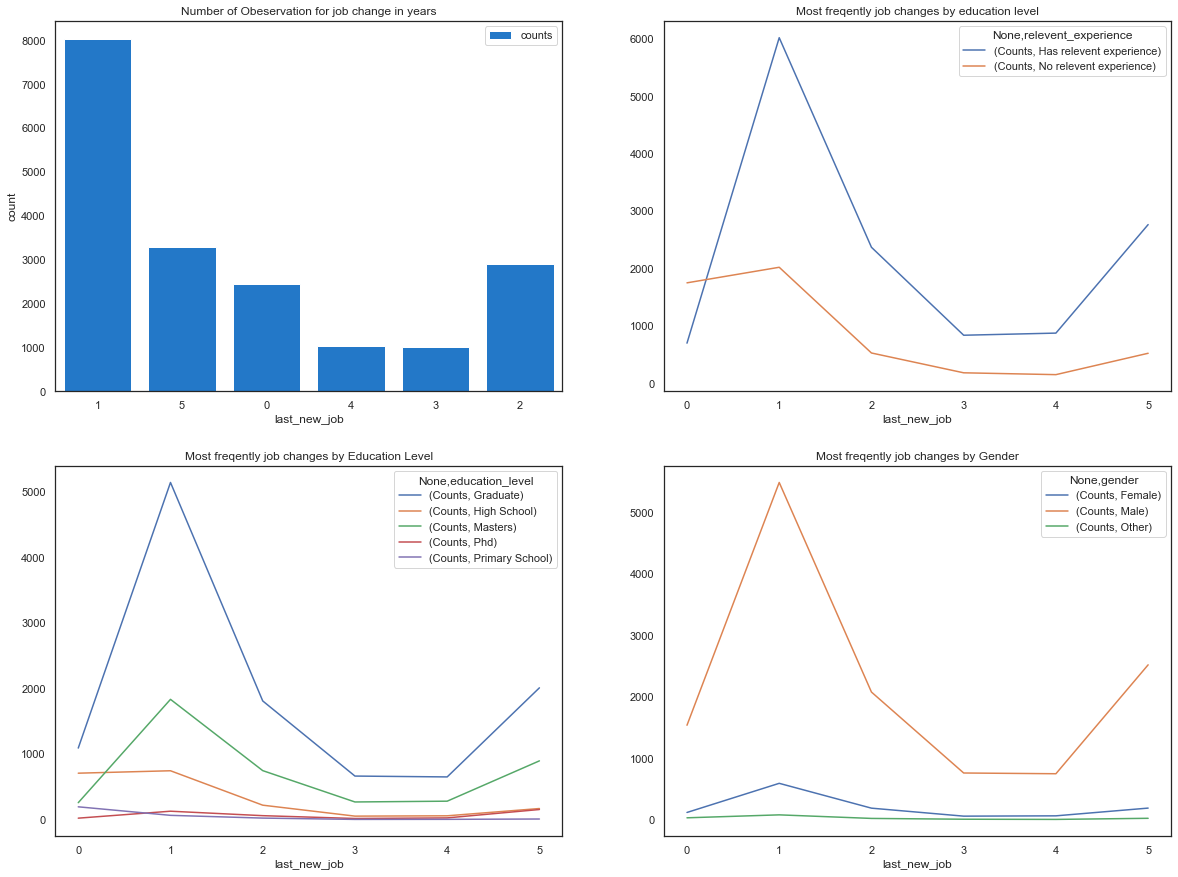

In [25]:
#Examine the last_new_job variable.

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 15))

# Number of observation for last_new_job.

ax1 = sns.countplot(df.last_new_job, color="#0779E4", ax = axs[0, 0], label='counts')
ax1.set_title("Number of Obeservation for job change in years")
ax1.legend()


# Relation between year of difference between job change and relevent experience?
b = pd.DataFrame(df.groupby(['last_new_job', 'relevent_experience']).count()['enrollee_id'])
b.rename(columns={'enrollee_id':'Counts'}, inplace=True)
ax2 = b.unstack().plot(ax=axs[0,1])
ax2.set_title("Most freqently job changes by education level")


# Relation between year of difference between job change and education level?
c = pd.DataFrame(df.groupby(['last_new_job', 'education_level']).count()['enrollee_id'])
c.rename(columns={'enrollee_id':'Counts'}, inplace=True)
ax3 = c.unstack().plot(kind='line', ax=axs[1,0])
ax3.set_title("Most freqently job changes by Education Level")


# Who changes the job Most frequently?
d = pd.DataFrame(df.groupby(['last_new_job', 'gender']).count()['enrollee_id'])
d.rename(columns={'enrollee_id':'Counts'}, inplace=True)
ax4 = d.unstack().plot(kind='line', ax=axs[1,1])
ax4.set_title("Most freqently job changes by Gender")

plt.show()

#### Insights
- Most of the enrolled candidates have 1 year of difference between their new job and previous job and these are mostly Graduates and Masters candidates.
- Candidates with 1 year of difference in new job and previous job have relevent experience.

## Conclusions
- We have 25% of employees leaving and 75% staying back.
- City development is definitely an important factor.
- Most of the employees belong private sector and most of them are men.
- Many employees prefer to stay in developed cities, mostly less developed city people are leaving.
- Gender disparity is there in job sectors. Male has dominance.
- Younger generation even if they dont have relevant experience will leave.